**Dijkstra's Single Source Shortest Path Algorithm**

In [11]:
def min_dist_node(dist,que):
    minDist = math.inf
    for node in que:
        if dist[node] < minDist:
            minNode = node
            minDist = dist[node]
    print("minNode =",minNode)
    return minNode

**Helper Functions:**

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pylab as plt
import math
import copy

**Helper Function:**

In [2]:
def min_dist_node(dist,que): # Returns index of value in que that is associated with smallest value in dist
    minDist = math.inf
    for node in que:
        if dist[node] < minDist:
            minNode = node
            minDist = dist[node]
    return minNode  # Will be the next node checked by Dijkstra's

**Dijkstra's:**

In [3]:
def dijkstra(G, source):
    nodes = G.nodes()
    edges = G.edges()
    dist = dict()
    previous = dict()
    for node in nodes:
        dist[node] = float("inf")
        previous[node] = None
    dist[source] = 0
    queue = set(nodes)
    while len(queue) > 0:
        current = min_dist_node(dist,queue)
        neighbors = G.neighbors(current)
        for node in neighbors:
            distance = dist[current] + G[current][node]['weight']
            if distance < dist[node]:
                dist[node] = distance
                previous[node] = current
        queue.remove(current)       
    return previous,dist

**Test Network:**

In [4]:
G = nx.Graph()
G.add_weighted_edges_from([(1,2,2),(1,3,4),(2,3,1),(2,4,7),(3,5,3),(4,5,2),(4,6,1),(5,6,5)])

**Visualize Network:** Acquired from Aric Hagberg, https://groups.google.com/forum/#!topic/networkx-discuss/hw3OVBF8orc

C:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


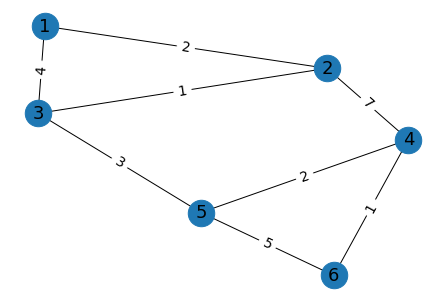

In [5]:
pos=nx.spring_layout(G)
plt.figure(1)
nx.draw(G,pos,with_labels=True,font_size=18,node_size=700,)
edge_labels=dict([((u,v,),d['weight'])
             for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,font_size=14)
plt.show()

**Execute Dijkstra's:**

In [6]:
previous,distance = dijkstra(G, 3)
print("previous =",previous,"\ndistance =",distance)

previous = {1: 2, 2: 3, 3: None, 4: 5, 5: 3, 6: 4} 
distance = {1: 3, 2: 1, 3: 0, 4: 5, 5: 3, 6: 6}


**Construct SSSP Tree:**

In [7]:
SSSPT= nx.Graph()
for node in previous:
    if previous[node]!=None:
        weight=distance[node]-distance[previous[node]]
        SSSPT.add_edge(node,previous[node],weight=weight)

**Visualise SSSP Tree:**

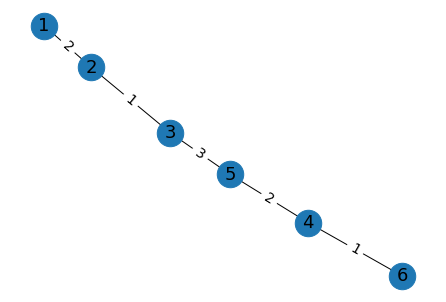

In [8]:
pos=nx.spring_layout(SSSPT)
plt.figure(1)
nx.draw(SSSPT,pos,with_labels=True,font_size=18,node_size=700,)
edge_labels=dict([((u,v,),d['weight'])
             for u,v,d in SSSPT.edges(data=True)])
nx.draw_networkx_edge_labels(SSSPT,pos,edge_labels=edge_labels,font_size=14)
plt.show()